## Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Selected features that were significantly different between speech samples for
# AWS and AWNS 

In [ ]:
par_details = pd.read_csv(#'.../Stat_csv_files/AWNS_AWS_all_details.csv') #Change path as required

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pause_Duration_s','Pause_Events','CV Speech','Mean Pause_s','long_p_count','Speech_Rate','short_p_durations_mean'] 

X = par_details[feature_cols] # Features
y = par_details['Group'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124) # 80% training and 20% test

In [ ]:
feature_cols1 = feature_cols + ['Group']
data = par_details.loc[:, feature_cols1]

In [ ]:
# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=5)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571
Confusion matrix:
[[4 1]
 [0 2]]


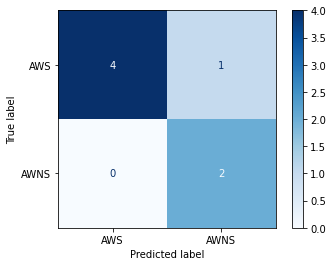

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)

#Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AWS', 'AWNS'])
disp.plot(cmap=plt.cm.Blues)

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

# Define the target variable and features
target = 'Group'
features = [col for col in data.columns if col != target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.3, random_state=49)

# Define the random forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# Define the parameter grid for grid search
param_grid = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Perform repetitive random sampling with grid search
n_samples = 10
scores = []
for i in range(n_samples):
    # Sample a subset of the data
    sample = data.sample(frac=0.8, replace=True, random_state=i)
    X = sample[features]
    y = sample[target]
    
    # Perform grid search on the random forest classifier
    rs = RandomizedSearchCV(rfc, param_grid, cv=3, n_iter=10, random_state=i)
    rs.fit(X, y)
    
    # Print the metrics for the best model
    print(f"Sample {i+1} - Best score: {rs.best_score_:.3f}")
    print(f"Sample {i+1} - Best parameters: {rs.best_params_}")
    scores.append(rs.best_score_)
    


Sample 1 - Best score: 0.819
Sample 1 - Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
Sample 2 - Best score: 0.752
Sample 2 - Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
Sample 3 - Best score: 0.748
Sample 3 - Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 7}
Sample 4 - Best score: 0.822
Sample 4 - Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}
Sample 5 - Best score: 0.893
Sample 5 - Best parameters: {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7}
Sample 6 - Best score: 0.819
Sample 6 - Best parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3}
Sample 7 - Best score: 0.893
Sample 7 - Best parameters: {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None, 'max_

In [ ]:
# Train the selected model on the entire dataset
best_params_index = np.argmax(scores)
best_params = rs.cv_results_['params'][best_params_index]
rfc = RandomForestClassifier(n_estimators=100, **best_params)
rfc.fit(data[features], data[target])

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rfc, data[features], data[target], cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores):.3f}")


Cross-validation scores: [0.5        0.75       0.81818182]
Mean cross-validation score: 0.689


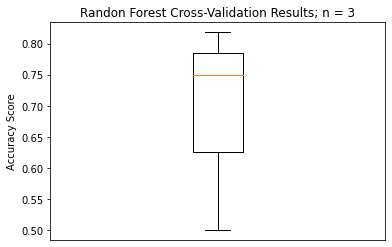

In [ ]:
# Plot the cross-validation scores
plt.boxplot(cv_scores)
num =3
plt.title("Randon Forest Cross-Validation Results; n = %i" %num)
plt.xticks([])
plt.ylabel("Accuracy Score")
plt.show()

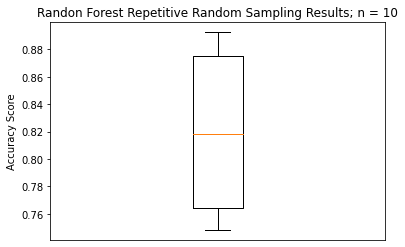

In [ ]:
# Plot the cross-validation scores
plt.boxplot(scores)
num =10
plt.title("Randon Forest Repetitive Random Sampling Results; n = %i" %num)
plt.xticks([])
plt.ylabel("Accuracy Score")
plt.show()